<a href="https://colab.research.google.com/github/ikanx101/G-Colab/blob/main/Black_Hole_Optimization_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# _LEARNING FORUM MARKET RESEARCH_

by: [Ikang Fadhli](https:\\ikanx101.com)

## _Introduction to Meta Heuristic Optimization Algorithm_

_Meta heuristic algorithm_ adalah algoritma yang terinspirasi oleh kejadian yang terjadi secara alami di dunia ini. Bisa berasal dari mahluk hidup (_population inspired_) atau _natural event_.

Berbeda dengan solusi eksak yang __sudah pasti__ menghasilkan solusi paling optimal, solusi hasil perhitungan _meta heuristic_ __belum tentu menghasilkan solusi paling optimal__.

Kenapa demikian? Karena setiap algoritmanya mengandung unsur keacakan.

> ___Konon setiap kejadian yang terjadi di dunia terjadi secara acak.___

Namun dengan melakukan beberapa _improvements_, kita bisa mendapatkan solusi yang optimal dari perhitungan _meta heuristic_.

Kali ini kita akan membahas dua algoritma _meta heuristic_ yang memiliki konsep __hampir mirip__, yakni:

1. ___Black hole - big bang inspired optimization algorithm___
1. ___Spiral optimization algorithm___

Tapi sebelum membahas lebih lanjut, saya akan berikan beberapa materi pendahuluan sebagai berikut:

## Optimisasi

Masalah optimisasi yang ada di matematika sebenarnya adalah masalah pencarian nilai maksimum atau minimum. Terlepas dari apakah ada _constraints_ atau tidak.

Oleh karena itu, ada dua istilah yang sering muncul saat kita berbicara mengenai hal ini:

1. _Local optima_: nilai maksimum atau minimum yang terjadi di selang tertentu. Bukan merupakan solusi dari keseluruhan daerah definisi.
1. _Global optimum_: nilai maksimum atau minimum yang terjadi di daerah definisi. Ini adalah solusi yang dicari.

![](https://www.allaboutlean.com/wp-content/uploads/2018/08/Local-Global-Optimum.png)

<br>

---

# Aplikasi Algoritma Optimisasi

Untuk apa _sih_ kita menggunakan algoritma _meta heuristic_ ini?

> ___Menyelesaikan permasalahan yang ditemui...___

Lebih besar dari masalah yang kkita hadapi saat training optimisasi di KampusX silam. Aplikasi algoritma ini sangat banyak, mulai dari:

1. Penyelesaian masalah optimisasi (baik linear atau non linear).
    - Bisa untuk menyelesaikan _objective function_ yang linear atau tidak linear.
    - Bisa untuk menyelesaikan berbagai macam tipe variabel: diskrit, kontinu, dan biner.
    - Bisa untuk menyelesaikan _constrained problem_ dan _unconstrained problem_.
1. _Feature selection_ untuk:
    - _Machine learning model_. 
    - _Deep learning model_.
    - Baik untuk permasalahan klasifikasi dan regresi.
1. dll (tergantung imajinasi Anda).

Kita akan bahas satu-persatu di bagian selanjutnya.

<br>

---
<br>

# _BIG BANG - BLACK HOLE INSPIRED OPTIMIZATION ALGORITHM_
## Pendahuluan

BHO merupakan salah satu algoritma optimisasi _meta heuristic_ yang terinspirasi dari kejadian _big bang_ hingga kemunculan _black hole_ sehingga __memakan__ objek angkasa yang lain.

![](https://cdn.mos.cms.futurecdn.net/eC6Q4Civ8TurCZbYA5wNmm-1024-80.jpg.webp)

Prinsip kerjanya sederhana, yakni:

1. Menjadikan salah satu bintang sebagai _black hole_.
1. Menarik semua bintang lain menuju _black hole_ karena gravitasinya.
1. Saat bintang masuk ke area _event horizon_ dari _black hole_, maka bintang tersebut akan hilang. 

## _Pseudocode_

Misalkan kita hendak mencari $x \in D$ yang menyebabkan $\min{f(x)}$. _Pseudocode_ dari algoritma ini adalah:

```
STEP I
  define:
    max_iter
  generate stars randomly
    xi
STEP II
  evaluate all xi
    fxi
STEP III
  define black hole (xi that produce min(fxi)) 
    x*
  define gravity rate (constant or not)
    g in [0,1]
  define event horizon radius
    r = f(x*) / sum(f(xi))
STEP IV
  pull all stars into black hole at gravity rate
    xi' = x* + g (x* - xi)
  eliminate all stars in event horizon radius
    if d(x*,xi) < r :
      delete xi
STEP V
  if number of stars getting lower:
    generate stars all over
STEP VI
  loop STEP II to STEP V all over
  until 
    converge or
    max iteration
```

## Ilustrasi

Untuk memudahkan, lihatlah ilustrasi dari bintang-bintang sebagai berikut:

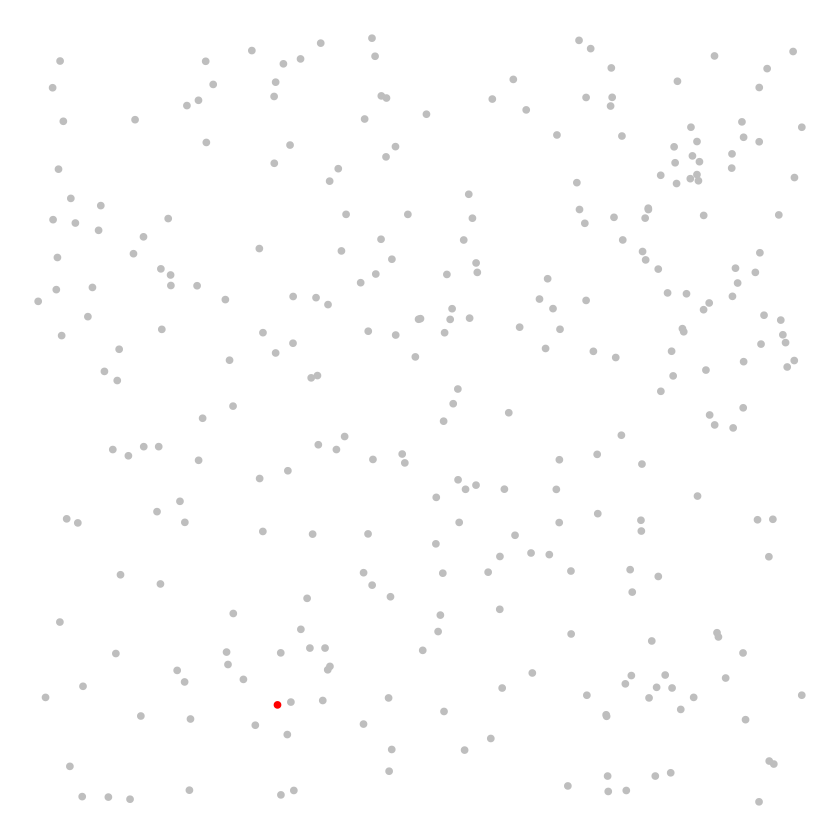

In [ ]:
rm(list=ls())
library(dplyr)
library(ggplot2)

N = 300
x = runif(N,0,1)
y = runif(N,0,1)

data.frame(x,y,color = c(1,rep(0,(N-1)))) %>% 
  ggplot(aes(x,y)) +
  geom_point(aes(color = factor(color))) +
  scale_color_manual(values = c("gray","red")) +
  theme_void() +
  theme(legend.position = "none")

Misalkan titik merah adalah titik solusi yang dicari. Maka titik merah akan menjadi _black hole_ yang menyerap semua bintang yang ada dengan suatu nilai _gravity rate_ tertentu.

Beberapa kritik atas algoritma ini adalah kelemahannya untuk mencari _global optima_. BHO cenderung __mudah terjebak__ dalam _local optima_ (seolah-olah _local optima_ adalah solusi yang dicari sehingga menjadikan _black hole_ terlalu cepat memakan bintang yang lain).

Kita bisa melakukan _improvement_ dengan mengubah cara perhitungan _gravity rate_.

## Hal Penting dalam BHO

Setidaknya ada dua hal yang perlu didefinisikan dalam BHO, yakni:

1. _Gravity rate_
1. _Radius event horizon_

### _Gravity rate_

Agar BHO bisa mengeksploitasi area definisi lebih baik, maka _gravity rate_ didefinisikan sebagai:

$$g = \text{random}(0,1.5)$$

Nilai random antara [0,1.5].

Hal ini memastikan adanya konstraksi dan relaksasi bintang ke area-area lainnya.

### _Radius event horizon_

Radius _event horizon_ bisa kita definisikan:

$$r = \frac{f_{bh}}{\sum{f_{xi}}}$$

---

# MAXIMIZING / MINIMIZING

## Contoh 

Cari $x,y$ yang membuat $f(x,y) = x^2 + y^2$ minimum di $x,y \in [-1,1]$

In [ ]:
# dimulai dari hati yang bersih
rm(list=ls())
library(dplyr)

# definisi fungsi soal
f = function(vec) vec[1]^2 + vec[2]^2

# definisi fungsi generate star
big_bang = function() runif(2,-1,1) %>% round(1)

# definisi 
# berapa banyak bintang
N = 500
stars = vector("list",N)
# rumah untuk fxi
fxi = rep(999,N)
# definisikan dulu max iteration yang diperbolehkan
max_iter = 600

# membuat bintang dan menghitung nilai fxi-nya
for(i in 1:N){
  stars[[i]] = big_bang()
  fxi[i] = f(stars[[i]])
}

# mencari black hole
n_bh = which.min(fxi) # star ke berapa yang punya nilai fxi terkecil
bh = stars[[n_bh]] # definisi black hole
f_bh = fxi[n_bh] # nilai f_bh

# iterasi BHO kita mulai dari sini
for(ikang in 1:max_iter){
  # menghitung radius event horizon
  r = f_bh / sum(fxi)

  # saat ada bintang yang berjarak kurang dari r akan kita hapus
  jarak = abs(fxi - f_bh)
  n_luar = which(jarak >= r)

  # stars yang ada di n_luar 
  stars = stars[n_luar]

  # jika jumlah stars < N --> big bang lagi
  n_stars = length(stars)
  if(n_stars < N){
    # membuat bintang dan menghitung nilai fxi-nya
    for(i in (n_stars + 1):N){
        stars[[i]] = big_bang()
        fxi[i] = f(stars[[i]])
    }
  }

  # gravity rate - akan dbuat tetap
  g = runif(1,0,1.5)

  # iterasi proses penarikan bintang ke black hole
  for(j in 1:N){
    xt = stars[[j]]
    xt_new = bh + g * (xt - bh)
    xt_new = xt_new %>% round(1)
    fxi[j] = f(xt_new)
    stars[[j]] = xt_new
  }

  # mencari black hole
  n_bh = which.min(fxi) # star ke berapa yang punya nilai fxi terkecil
  bh = stars[[n_bh]] # definisi black hole
  f_bh = fxi[n_bh] # nilai f_bh
}

n_solusi = which.min(fxi)
stars[[n_solusi]] %>% round(2)
min(fxi)

[1] 0 0

[1] 0

## Contoh

Cari $x_1,x_2$ yang meminimumkan fungsi berikut ini:

$$f(x_1,x_2) = \frac{x_1^4 - 16 x_1^2 + 5 x_1}{2} + \frac{x_2^4 - 16 x_2^2 + 5 x_2}{2} \\ -4 \leq x_1,x_2 \leq 4$$

In [ ]:
# dimulai dari hati yang bersih
rm(list=ls())

library(dplyr)

# definisi fungsi soal
f = function(vec) {
  ka = vec[1]^4 - 16 * vec[1]^2 + 5 * vec[1]
  ka = ka / 2
  ki = vec[2]^4 - 16 * vec[2]^2 + 5 * vec[2]
  ki = ki / 2
  return(ka + ki)
}

# definisi fungsi generate star
big_bang = function() runif(2,-4,4)

# definisi 
# berapa banyak bintang
N = 700
stars = vector("list",N)
# rumah untuk fxi
fxi = rep(999,N)
# definisikan dulu max iteration yang diperbolehkan
max_iter = 50

# membuat bintang dan menghitung nilai fxi-nya
for(i in 1:N){
  stars[[i]] = big_bang()
  fxi[i] = f(stars[[i]])
}

# mencari black hole
n_bh = which.min(fxi) # star ke berapa yang punya nilai fxi terkecil
bh = stars[[n_bh]] # definisi black hole
f_bh = fxi[n_bh] # nilai f_bh

# iterasi BHO kita mulai dari sini
for(ikang in 1:max_iter){
  # menghitung radius event horizon
  r = f_bh / sum(fxi)

  # saat ada bintang yang berjarak kurang dari r akan kita hapus
  jarak = abs(fxi - f_bh)
  n_luar = which(jarak >= r)

  # stars yang ada di n_luar 
  stars = stars[n_luar]

  # jika jumlah stars < N --> big bang lagi
  n_stars = length(stars)
  if(n_stars < N){
    # membuat bintang dan menghitung nilai fxi-nya
    for(i in (n_stars + 1):N){
        stars[[i]] = big_bang()
        fxi[i] = f(stars[[i]])
    }
  }

  # gravity rate - akan dbuat tetap
  g = runif(1,0,1.5)

  # iterasi proses penarikan bintang ke black hole
  for(j in 1:N){
    xt = stars[[j]]
    xt_new = bh + g * (xt - bh)
    fxi[j] = f(xt_new)
    stars[[j]] = xt_new
  }

  # mencari black hole
  n_bh = which.min(fxi) # star ke berapa yang punya nilai fxi terkecil
  bh = stars[[n_bh]] # definisi black hole
  f_bh = fxi[n_bh] # nilai f_bh
}

n_solusi = n_bh
stars[[n_solusi]] %>% round(2)
f_bh

[1] -2.92 -2.89

[1] -78.32615

---

# PENCARIAN AKAR

Apa hubungannya optimisasi dengan pencarian akar?

Kita bisa mengubah masalah optimisasi menjadi masalah pencarian akar dengan cara:

Suatu sistem memiliki solusi $x = (x_1,x_2,..,x_n)^T$ jika $F(x)$ yang kita definisikan sebagai:

$$F(x) = \frac{1}{1 + \sum_{i = 1}^n |g_i(x)|}$$

memiliki nilai maksimum sama dengan 1.

__Akibatnya algoritma yang sebelumnya adalah mencari nilai__ $\min{F(x)}$ __diubah mencari__ $\max{F(x)}$.

Akibatnya $x$ menjadi akar dari $g_i(x),\space i = 1,2,..,n$.

## Contoh Soal

Kita akan gunakan BHO untuk menyelesaikan permasalahan pencarian akar untuk persamaan _diophantine_ berikut:

$$x^2 + y^2 = 625, 0 \leq x,y \leq 25$$

In [ ]:
# dimulai dari hati yang bersih
rm(list=ls())

library(dplyr)

# definisi fungsi soal
f = function(vec) {
  g = vec[1]^2 + vec[2]^2 - 625
  g = abs(g)
  f = 1 / (1 + g)
  return(f)
}

# definisi fungsi generate star
big_bang = function() runif(2,-0.45,25.45) %>% round(0)

# definisi 
# berapa banyak bintang
N = 800
stars = vector("list",N)
# rumah untuk fxi
fxi = rep(999,N)
# definisikan dulu max iteration yang diperbolehkan
max_iter = 80

# membuat bintang dan menghitung nilai fxi-nya
for(i in 1:N){
  stars[[i]] = big_bang()
  fxi[i] = f(stars[[i]])
}

# mencari black hole
n_bh = which.max(fxi) # star ke berapa yang punya nilai fxi terkecil
bh = stars[[n_bh]] # definisi black hole
f_bh = fxi[n_bh] # nilai f_bh

# iterasi BHO kita mulai dari sini
for(ikang in 1:max_iter){
  # menghitung radius event horizon
  r = f_bh / sum(fxi)

  # saat ada bintang yang berjarak kurang dari r akan kita hapus
  jarak = abs(fxi - f_bh)
  n_luar = which(jarak >= r)

  # stars yang ada di n_luar 
  stars = stars[n_luar]

  # jika jumlah stars < N --> big bang lagi
  n_stars = length(stars)
  if(n_stars < N){
    # membuat bintang dan menghitung nilai fxi-nya
    for(i in (n_stars + 1):N){
        stars[[i]] = big_bang()
        fxi[i] = f(stars[[i]])
    }
  }

  # gravity rate - akan dbuat tetap
  g = runif(1,0,1.5)

  # iterasi proses penarikan bintang ke black hole
  for(j in 1:N){
    xt = stars[[j]]
    xt_new = bh + g * (xt - bh)
    xt_new_1 = xt_new %>% round(0)
    fxi[j] = f(xt_new_1)
    stars[[j]] = xt_new
  }

  # mencari black hole
  n_bh = which.max(fxi) # star ke berapa yang punya nilai fxi terkecil
  bh = stars[[n_bh]] # definisi black hole
  f_bh = fxi[n_bh] # nilai f_bh
}

stars[[n_bh]] %>% round(0)
fxi[n_bh]

[1]  7 24

[1] 1

---

# OPTIMISASI

> Bagaimana menyelesaikan _mixed integer programming_ (baik _linear_ dan _non linear_) menggunakan BHO?

## Mengubah _Constrained Optimization_

Salah satu trik yang bisa dilakukan agar SOA bisa menyelesaikan _mixed integer programming_ adalah dengan mengubah _constrained optimization problem_ menjadi _unconstrained optimization problem_ kemudian memanfaatkan _penalty constant_.

Misal suatu permasalahan MILP atau MINLP bisa ditulis secara umum sebagai berikut:

$$\min_{x \in \mathbb{R}^n} f(x)$$

$$\text{subject to: } g_i(x) = 0, i = 1,2,..,M$$

$$\text{and } h_j(x) \leq 0,i = 1,2,..,N$$

$$x = (x_1,x_2,...,x_n)^T \in \mathbb{N}$$

Bentuk di atas bisa kita ubah menjadi:

$$F(x,\alpha,\beta) = f(x) + \sum_{i=1}^M \alpha_i g_i^2(x) + \sum_{j = 1}^N \beta_j (\max{(h_i(x),0)})^2$$

dimana $\alpha,\beta$ merupakan _penalty constant_ yang bisa dibuat sangat besar.

## Contoh Soal

Oke, untuk contoh kasus pertama saya akan gunakan persoalan yang pernah saya tulis di [blog sebelumnya](https://ikanx101.com/blog/linear-r/).

Cari $(x,y)$ yang memaksimalkan $7000 x + 12000 y$ dengan _constraints_ sebagai berikut:

$$4x + 20y \leq 1960 \\ x + y \leq 250 \\ x,y \geq 0 \\ x,y \in \mathbb{Z}^+$$

In [ ]:
# dimulai dari hati yang suci
rm(list=ls())

# definisi fungsi soal
f1 = function(x){-7000*x[1] - 12000*x[2]}
h1 = function(x){4*x[1] + 20*x[2] - 1960}
h2 = function(x){x[1] + x[2] - 250}
# definisi penalty constant
beta = 10^25
# objective function final
f = function(x){
  el_1 = f1(x) 
  el_2 = beta * (max(h1(x),0))^2
  el_3 = beta * (max(h2(x),0))^2
  return(el_1 + el_2 + el_3)
}

# definisi fungsi generate star
big_bang = function() runif(2,-0.45,250) %>% round(0)

# definisi 
# berapa banyak bintang
N = 200
stars = vector("list",N)
# rumah untuk fxi
fxi = rep(999,N)
# definisikan dulu max iteration yang diperbolehkan
max_iter = 80

# membuat bintang dan menghitung nilai fxi-nya
for(i in 1:N){
  stars[[i]] = big_bang()
  fxi[i] = f(stars[[i]])
}

# mencari black hole
n_bh = which.min(fxi) # star ke berapa yang punya nilai fxi terkecil
bh = stars[[n_bh]] # definisi black hole
f_bh = fxi[n_bh] # nilai f_bh

# iterasi BHO kita mulai dari sini
for(ikang in 1:max_iter){
  # menghitung radius event horizon
  r = f_bh / sum(fxi)

  # saat ada bintang yang berjarak kurang dari r akan kita hapus
  jarak = abs(fxi - f_bh)
  n_luar = which(jarak >= r)

  # stars yang ada di n_luar 
  stars = stars[n_luar]

  # jika jumlah stars < N --> big bang lagi
  n_stars = length(stars)
  if(n_stars < N){
    # membuat bintang dan menghitung nilai fxi-nya
    for(i in (n_stars + 1):N){
        stars[[i]] = big_bang()
        fxi[i] = f(stars[[i]])
    }
  }

  # gravity rate - akan dbuat tetap
  g = runif(1,0,1.5)

  # iterasi proses penarikan bintang ke black hole
  for(j in 1:N){
    xt = stars[[j]]
    xt_new = bh + g * (xt - bh)
    xt_new_1 = xt_new %>% round(0)
    fxi[j] = f(xt_new_1)
    stars[[j]] = xt_new
  }

  # mencari black hole
  n_bh = which.min(fxi) # star ke berapa yang punya nilai fxi terkecil
  bh = stars[[n_bh]] # definisi black hole
  f_bh = fxi[n_bh] # nilai f_bh
}

stars[[n_bh]] %>% round(0)
fxi[n_bh]

[1] 190  60

[1] -2050000

## Contoh Soal

Cari $x_1,x_2$ yang memaksimalkan $3x_1 + 5x_2$ dengan _constraints_:

$$\begin{matrix}
x_1 \leq 4 \\
2 x_2 \leq 12 \\
3 x_1 + 2 x_2 \leq 18 \\
x_1,x_2 \geq 0
\end{matrix}$$

In [ ]:
# dimulai dari hati yang suci
rm(list=ls())

# definisi fungsi soal
f1 = function(x){3*x[1] + 5*x[2]}
h1 = function(x){x[1] - 4}
h2 = function(x){2 * x[2] - 12}
h3 = function(x){3 * x[1] + 2 * x[2] - 18}

# definisi penalty constant
beta = 10^25

# objective function final
f = function(x){
  el_1 = - f1(x) 
  el_2 = beta * (max(h1(x),0))^2
  el_3 = beta * (max(h2(x),0))^2
  el_4 = beta * (max(h3(x),0))^2
  return(el_1 + el_2 + el_3 + el_4)
}

# definisi fungsi generate star
big_bang = function() runif(2,0,10) 

# definisi 
# berapa banyak bintang
N = 400
stars = vector("list",N)
# rumah untuk fxi
fxi = rep(999,N)
# definisikan dulu max iteration yang diperbolehkan
max_iter = 80

# membuat bintang dan menghitung nilai fxi-nya
for(i in 1:N){
  stars[[i]] = big_bang()
  fxi[i] = f(stars[[i]])
}

# mencari black hole
n_bh = which.min(fxi) # star ke berapa yang punya nilai fxi terkecil
bh = stars[[n_bh]] # definisi black hole
f_bh = fxi[n_bh] # nilai f_bh

# iterasi BHO kita mulai dari sini
for(ikang in 1:max_iter){
  # menghitung radius event horizon
  r = f_bh / sum(fxi)

  # saat ada bintang yang berjarak kurang dari r akan kita hapus
  jarak = abs(fxi - f_bh)
  n_luar = which(jarak >= r)

  # stars yang ada di n_luar 
  stars = stars[n_luar]

  # jika jumlah stars < N --> big bang lagi
  n_stars = length(stars)
  if(n_stars < N){
    # membuat bintang dan menghitung nilai fxi-nya
    for(i in (n_stars + 1):N){
        stars[[i]] = big_bang()
        fxi[i] = f(stars[[i]])
    }
  }

  # gravity rate - akan dbuat tetap
  g = runif(1,0,1.5)

  # iterasi proses penarikan bintang ke black hole
  for(j in 1:N){
    xt = stars[[j]]
    xt_new = bh + g * (xt - bh)
    xt_new_1 = xt_new 
    fxi[j] = f(xt_new_1)
    stars[[j]] = xt_new
  }

  # mencari black hole
  n_bh = which.min(fxi) # star ke berapa yang punya nilai fxi terkecil
  bh = stars[[n_bh]] # definisi black hole
  f_bh = fxi[n_bh] # nilai f_bh
}

stars[[n_bh]] 
fxi[n_bh]

[1] 2.009240 5.986128

[1] -35.95836

Jawaban eksak dari permasalahan di atas adalah $(2,6)$.

---

## Contoh Soal

Cari $x,y$ sehingga memaksimalkan $5x + 4y$ dengan _constraints_:

$$\begin{matrix}
3x + 5y \leq 78 \\
4x + y \leq 36 \\
x,y \geq 0
\end{matrix}$$

In [ ]:
# dimulai dari hati yang suci
rm(list=ls())

# definisi fungsi soal
f1 = function(x){5 * x[1] + 4 * x[2]}
h1 = function(x){3 * x[1] + 5 * x[2] - 78}
h2 = function(x){4 * x[1] + x[2] - 36}

# definisi penalty constant
beta = 10^25

# objective function final
f = function(x){
  el_1 = - f1(x) 
  el_2 = beta * (max(h1(x),0))^2
  el_3 = beta * (max(h2(x),0))^2
  return(el_1 + el_2 + el_3)
}

# definisi fungsi generate star
big_bang = function() runif(2,0,20) 

# definisi 
# berapa banyak bintang
N = 400
stars = vector("list",N)
# rumah untuk fxi
fxi = rep(999,N)
# definisikan dulu max iteration yang diperbolehkan
max_iter = 80

# membuat bintang dan menghitung nilai fxi-nya
for(i in 1:N){
  stars[[i]] = big_bang()
  fxi[i] = f(stars[[i]])
}

# mencari black hole
n_bh = which.min(fxi) # star ke berapa yang punya nilai fxi terkecil
bh = stars[[n_bh]] # definisi black hole
f_bh = fxi[n_bh] # nilai f_bh

# iterasi BHO kita mulai dari sini
for(ikang in 1:max_iter){
  # menghitung radius event horizon
  r = f_bh / sum(fxi)

  # saat ada bintang yang berjarak kurang dari r akan kita hapus
  jarak = abs(fxi - f_bh)
  n_luar = which(jarak >= r)

  # stars yang ada di n_luar 
  stars = stars[n_luar]

  # jika jumlah stars < N --> big bang lagi
  n_stars = length(stars)
  if(n_stars < N){
    # membuat bintang dan menghitung nilai fxi-nya
    for(i in (n_stars + 1):N){
        stars[[i]] = big_bang()
        fxi[i] = f(stars[[i]])
    }
  }

  # gravity rate - akan dbuat tetap
  g = runif(1,0,1.5)

  # iterasi proses penarikan bintang ke black hole
  for(j in 1:N){
    xt = stars[[j]]
    xt_new = bh + g * (xt - bh)
    xt_new_1 = xt_new 
    fxi[j] = f(xt_new_1)
    stars[[j]] = xt_new
  }

  # mencari black hole
  n_bh = which.min(fxi) # star ke berapa yang punya nilai fxi terkecil
  bh = stars[[n_bh]] # definisi black hole
  f_bh = fxi[n_bh] # nilai f_bh
}

stars[[n_bh]] 
fxi[n_bh]

[1]  5.968499 12.005147

[1] -77.86309

Solusi eksak dari masalah di atas adalah $(6,12)$

---

## Contoh Soal


$$\begin{matrix}
\max{7 x_1 + 3 x_2 + x_3} \\
\text{s.t. } 6 x_1 + 4 x_2 + 5 x_3 \leq 60 \\
8 x_1 + x_2 + 2 x_3 \leq 80 \\
9 x_1 + x_2 + 7 x_3 \leq 70 \\
x_3 \geq 0 \\
x_1,x_2 \in \mathbb{Z}^+
\end{matrix}$$

In [ ]:
# dimulai dari hati yang suci
rm(list=ls())

# definisi fungsi soal
f1 = function(x){7 * x[1] + 3 * x[2] + x[3]}
h1 = function(x){6 * x[1] + 4 * x[2] + 5 * x[3] - 60}
h2 = function(x){8 * x[1] + x[2] + 2 * x[3] - 80}
h3 = function(x){9 * x[1] + x[2] + 7 * x[3] - 70}

# definisi penalty constant
beta = 10^25

# objective function final
f = function(x){
  el_1 = - f1(x) 
  el_2 = beta * (max(h1(x),0))^2
  el_3 = beta * (max(h2(x),0))^2
  el_4 = beta * (max(h3(x),0))^2
  return(el_1 + el_2 + el_3 + el_4)
}

# definisi fungsi generate star
big_bang = function(){
  x1_x2 = runif(2,0,10) %>% round(0)
  x3 = runif(1,0,10)
  return(c(x1_x2,x3))
} 

# definisi 
# berapa banyak bintang
N = 400
stars = vector("list",N)
# rumah untuk fxi
fxi = rep(999,N)
# definisikan dulu max iteration yang diperbolehkan
max_iter = 100

# membuat bintang dan menghitung nilai fxi-nya
for(i in 1:N){
  stars[[i]] = big_bang()
  fxi[i] = f(stars[[i]])
}

# mencari black hole
n_bh = which.min(fxi) # star ke berapa yang punya nilai fxi terkecil
bh = stars[[n_bh]] # definisi black hole
f_bh = fxi[n_bh] # nilai f_bh

# iterasi BHO kita mulai dari sini
for(ikang in 1:max_iter){
  # menghitung radius event horizon
  r = f_bh / sum(fxi)

  # saat ada bintang yang berjarak kurang dari r akan kita hapus
  jarak = abs(fxi - f_bh)
  n_luar = which(jarak >= r)

  # stars yang ada di n_luar 
  stars = stars[n_luar]

  # jika jumlah stars < N --> big bang lagi
  n_stars = length(stars)
  if(n_stars < N){
    # membuat bintang dan menghitung nilai fxi-nya
    for(i in (n_stars + 1):N){
        stars[[i]] = big_bang()
        fxi[i] = f(stars[[i]])
    }
  }

  # gravity rate - akan dbuat tetap
  g = runif(1,0,1.5)

  # iterasi proses penarikan bintang ke black hole
  for(j in 1:N){
    xt = stars[[j]]
    xt_new = bh + g * (xt - bh)
    xt_new_1 = xt_new 
    xt_new_1[1] = xt_new[1] %>% round(0)
    xt_new_1[2] = xt_new[2] %>% round(0)
    fxi[j] = f(xt_new_1)
    stars[[j]] = xt_new_1
  }

  # mencari black hole
  n_bh = which.min(fxi) # star ke berapa yang punya nilai fxi terkecil
  bh = stars[[n_bh]] # definisi black hole
  f_bh = fxi[n_bh] # nilai f_bh
}

stars[[n_bh]] 
fxi[n_bh]

[1] 7.0000000 4.0000000 0.3999999

[1] -61.4

Solusi eksak dari permasalahan ini adalah $(7,4,0.4)$.

---

# _Machine Learning Feature Selection using BHO_

Selain menyelesaikan masalah optimisasi, BHO bisa digunakan untuk mengoptimalkan pemilihan variabel _predictors_ yang hendak dipilih menjadi model _machine learning_.

Jadi proses pemilihannya adalah dengan cara:

```
STEP I
  define:
    all available predictors
      xi
    target variable
      y
    machine learning model goodness of fit
      auc
  generate:
    binary numbers
      bi
  rules:
    bi == 1, xi is predictor
    bi == 0 , otherwise
STEP II
  evaluate all bi
    fbi = auc
STEP III
  define black hole (bi that produce max(fbi)) 
    b*
  define gravity rate (constant or not)
    g in [0,1.5]
  define event horizon radius
    r = f(b*) / sum(fbi)
STEP IV
  pull all stars into black hole at gravity rate
    bi' = b* + g (b* - bi)
  eliminate all stars in event horizon radius
    if d(b*,bi) < r :
      delete bi
STEP V
  if number of stars getting lower:
    generate stars all over
STEP VI
  loop STEP II to STEP V all over
  until 
    converge or
    max iteration
```

## Contoh Soal

Kita akan gunakan data `crime.csv` yang digunakan pada saat _training_ __R__ pada `bagian regresi linear`.

Kita akan mencari _predictors_ apa saja yang bisa memprediksi `inequality` dengan akurat.

In [ ]:
# dimulai dari hati yang bersih
rm(list=ls())

# kita pakai data crime
  # kita bersihkan dulu dari kotoran yang melekat
  data = read.csv("https://raw.githubusercontent.com/ikanx101/209_ITB/main/Meta%20Heuristics/Spiral%20Optimization/tulisan%203/crime.csv")
  data$X = NULL
# save variabel target
target = data$Ineq
# menghilangkan target
data = 
  data %>%
  select(-Ineq)
# persiapan untuk membuat objective function
nama_var = colnames(data)

# objective function --> memaksimalkan AUC
f = function(x){
  x = round(x)
  predictor = nama_var[x == 1]
  train = data[predictor]
  train$target = target

  modellog = lm(target ~ ., data = train)
  hasil = summary(modellog)
  r_sq = hasil$adj.r.squared
  return(-r_sq)
}

# definisi fungsi generate star
big_bang = function() runif(ncol(data),0,1)

# definisi 
# berapa banyak bintang
N = 900
stars = vector("list",N)
# rumah untuk fxi
fxi = rep(999,N)
# definisikan dulu max iteration yang diperbolehkan
max_iter = 100

# membuat bintang dan menghitung nilai fxi-nya
for(i in 1:N){
  stars[[i]] = big_bang()
  fxi[i] = f(stars[[i]])
}

# mencari black hole
n_bh = which.min(fxi) # star ke berapa yang punya nilai fxi terkecil
bh = stars[[n_bh]] # definisi black hole
f_bh = fxi[n_bh] # nilai f_bh

# iterasi BHO kita mulai dari sini
for(ikang in 1:max_iter){
  # menghitung radius event horizon
  r = f_bh / sum(fxi)

  # saat ada bintang yang berjarak kurang dari r akan kita hapus
  jarak = abs(fxi - f_bh)
  n_luar = which(jarak >= r)

  # stars yang ada di n_luar 
  stars = stars[n_luar]

  # jika jumlah stars < N --> big bang lagi
  n_stars = length(stars)
  if(n_stars < N){
    # membuat bintang dan menghitung nilai fxi-nya
    for(i in (n_stars + 1):N){
        stars[[i]] = big_bang()
        fxi[i] = f(stars[[i]])
    }
  }

  # gravity rate - akan dbuat tetap
  g = runif(1,0,1.5)

  # iterasi proses penarikan bintang ke black hole
  for(j in 1:N){
    xt = stars[[j]]
    xt_new = bh + g * (xt - bh)
    xt_new_1 = xt_new
    fxi[j] = f(xt_new_1)
    stars[[j]] = xt_new_1
  }

  # mencari black hole
  n_bh = which.min(fxi) # star ke berapa yang punya nilai fxi terkecil
  bh = stars[[n_bh]] # definisi black hole
  f_bh = fxi[n_bh] # nilai f_bh
}

jawab = stars[[n_bh]] %>% round()
nama_var[jawab == 1]
fxi[n_bh]

[1] "M"   "So"  "Ed"  "Po1" "LF"  "Pop" "GDP" "y"

[1] -0.8893899

Hasil di atas sama dengan perhitungan _forward - backward stepwise linear regression_.

## Contoh Soal

Sekarang kita akan coba melakukan _feature selection_ dengan BHO untuk model prediksi `diabetes.csv`.

_Goodness of fit_ parameter yang digunakan adalah akurasi dari _confusion matrix_.

In [ ]:
# dimulai dari hati yang suci
rm(list=ls())

# libraries
library(dplyr)

# ambil data
  # sekaligus bebersih data
  data = read.csv("https://raw.githubusercontent.com/ikanx101/Live-Session-Nutrifood-R/master/Kaggle%20Data/Diabetes/raw%20data/diabetes.csv")
  colnames(data) = tolower(colnames(data))
  nama_var = colnames(data)

# kita bagi dua dulu
  # berdasarkan outcome
  data_1 = data %>% filter(outcome == 1)
  data_0 = data %>% filter(outcome == 0)
  
# kita pisah dulu
id_train_data_1 = sample(nrow(data_1),190,replace = F)
id_train_data_0 = sample(nrow(data_0),190,replace = F)

# train data
train = rbind(data_1[id_train_data_1,],
              data_0[id_train_data_0,])
target_train = train$outcome
train$outcome = NULL
nama_var = colnames(train)

# test data
test = rbind(data_1[-id_train_data_1,],
             data_0[-id_train_data_0,])
target_test = test$outcome
test$outcome = NULL

# bikin function
f = function(x){
  x = round(x)
  if(sum(x) > 0) {
    predictor = nama_var[x == 1]
    train_df = train[predictor]
    train_df$target = target_train
    
    modellog = glm(target ~ ., data = train_df, family = "binomial")
    test_pred = predict(modellog, newdata = test, type = "response")
    test_pred = ifelse(test_pred > 0.5,1,0)
    akurasi = sum(test_pred == target_test) / length(target_test)
  }
  else if(sum(x) <= 0){akurasi = 0.1}
  return(akurasi)
}

# definisi fungsi generate star
big_bang = function() runif(ncol(train),0,1)

# definisi 
# berapa banyak bintang
N = 300
stars = vector("list",N)
# rumah untuk fxi
fxi = rep(999,N)
# definisikan dulu max iteration yang diperbolehkan
max_iter = 80

# membuat bintang dan menghitung nilai fxi-nya
for(i in 1:N){
  stars[[i]] = big_bang()
  fxi[i] = f(stars[[i]])
}

# mencari black hole
n_bh = which.max(fxi) # star ke berapa yang punya nilai fxi terkecil
bh = stars[[n_bh]] # definisi black hole
f_bh = fxi[n_bh] # nilai f_bh

# iterasi BHO kita mulai dari sini
for(ikang in 1:max_iter){
  # menghitung radius event horizon
  r = f_bh / sum(fxi)

  # saat ada bintang yang berjarak kurang dari r akan kita hapus
  jarak = abs(fxi - f_bh)
  n_luar = which(jarak >= r)

  # stars yang ada di n_luar 
  stars = stars[n_luar]

  # jika jumlah stars < N --> big bang lagi
  n_stars = length(stars)
  if(n_stars < N){
    # membuat bintang dan menghitung nilai fxi-nya
    for(i in (n_stars + 1):N){
        stars[[i]] = big_bang()
        fxi[i] = f(stars[[i]])
    }
  }

  # gravity rate - akan dbuat tetap
  g = runif(1,0,1.5)

  # iterasi proses penarikan bintang ke black hole
  for(j in 1:N){
    xt = stars[[j]]
    xt_new = bh + g * (xt - bh)
    xt_new_1 = xt_new
    fxi[j] = f(xt_new_1)
    stars[[j]] = xt_new_1
  }

  # mencari black hole
  n_bh = which.max(fxi) # star ke berapa yang punya nilai fxi terkecil
  bh = stars[[n_bh]] # definisi black hole
  f_bh = fxi[n_bh] # nilai f_bh
}

jawab = stars[[n_bh]] %>% round()
nama_var[jawab == 1]
fxi[n_bh]

[1] "pregnancies"              "glucose"                 
[3] "bloodpressure"            "skinthickness"           
[5] "bmi"                      "diabetespedigreefunction"

[1] 0.7731959

Selain _feature selection_, kita sebenarnya bisa mengoptimalkan besaran proporsi pembagian _target variable_ `0` atau `1`.